### Import necessary modules

In [1]:
!curl -s https://course.fast.ai/setup/colab | bash

mkdir: /root/.torch/models: Permission denied
mkdir: /root/.fastai/data: Permission denied
ln: /content: Permission denied
ln: /content: Permission denied
Updating fastai...
Done.


In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.vision import *
from fastai.metrics import error_rate
from pathlib import Path

### Select path

In [4]:
path_img = Path('/Users/ldalessi/FAST_AI/Scraping/PASTA_TYPES/')
path_img.ls()

[PosixPath('/Users/ldalessi/FAST_AI/Scraping/PASTA_TYPES/.DS_Store'),
 PosixPath('/Users/ldalessi/FAST_AI/Scraping/PASTA_TYPES/Linguine'),
 PosixPath('/Users/ldalessi/FAST_AI/Scraping/PASTA_TYPES/Shell'),
 PosixPath('/Users/ldalessi/FAST_AI/Scraping/PASTA_TYPES/Lasagne'),
 PosixPath('/Users/ldalessi/FAST_AI/Scraping/PASTA_TYPES/pasta_dataset.pkl'),
 PosixPath('/Users/ldalessi/FAST_AI/Scraping/PASTA_TYPES/Orecchiette'),
 PosixPath('/Users/ldalessi/FAST_AI/Scraping/PASTA_TYPES/Spaghetti'),
 PosixPath('/Users/ldalessi/FAST_AI/Scraping/PASTA_TYPES/Farfalle'),
 PosixPath('/Users/ldalessi/FAST_AI/Scraping/PASTA_TYPES/Fusilli'),
 PosixPath('/Users/ldalessi/FAST_AI/Scraping/PASTA_TYPES/Rigatoni'),
 PosixPath('/Users/ldalessi/FAST_AI/Scraping/PASTA_TYPES/Penne'),
 PosixPath('/Users/ldalessi/FAST_AI/Scraping/PASTA_TYPES/Rotini')]

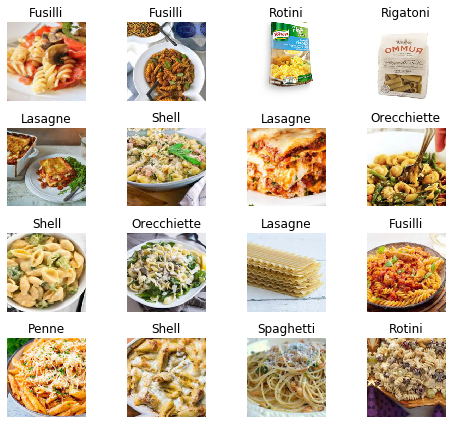

In [5]:
data1 = ImageDataBunch.from_folder(path_img, valid_pct=0.2, ds_tfms=get_transforms(), size=224, bs=32
                                  ).normalize(imagenet_stats)
data1.show_batch(rows=4, figsize=(7,6))
data1.save('pasta_dataset.pkl')
data1.export(file='pasta_dataset_full.pkl')

In [7]:
learn = cnn_learner(data1, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /Users/ldalessi/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:06<00:00, 14.5MB/s]


In [9]:
#learn.summary
learn.save()

In [ ]:
data2 = load_data(path='/Users/ldalessi/FAST_AI/Scraping/PASTA_TYPES/',file='pasta_dataset.pkl') 